Cifar 100 ANN

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from keras.backend import categorical_crossentropy
import os

In [2]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x=x_test
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

169017344/169001437 [==============================] - 6s 0us/step


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train=to_categorical(y_train,num_classes=100)
y_test=to_categorical(y_test,num_classes=100)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


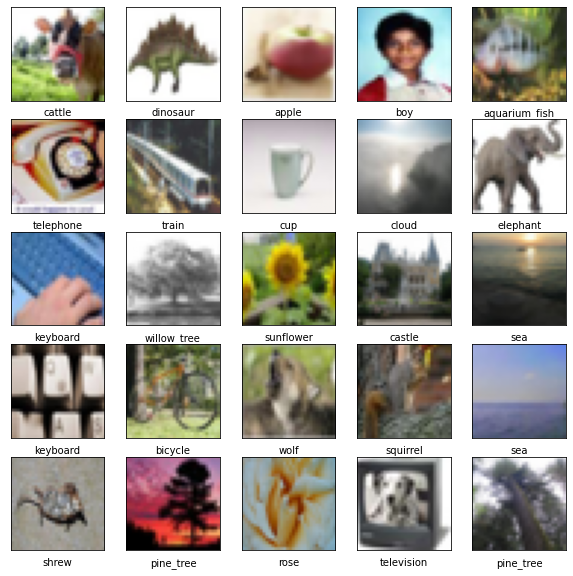

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(classes[np.argmax(y_train[i])])
plt.show()

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(784,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='Softmax'))
model.summary()
#opt = SGD(learning_rate=0.001,momentum=0.9)
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 784)               2409232   
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
Total params: 3,103,172
Trainable params: 3,103,172
Non-trainable params: 0
______________________________________________

2022-05-19 06:55:10.929872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 06:55:11.113916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 06:55:11.115193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-19 06:55:11.116987: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
history = model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test,y_test))

2022-05-19 06:55:19.405376: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
391/391 [==============================] - 4s 6ms/step - loss: 4.2446 - accuracy: 0.0636 - val_loss: 3.9533 - val_accuracy: 0.1052
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 3.8946 - accuracy: 0.1095 - val_loss: 3.7543 - val_accuracy: 0.1417
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 3.7338 - accuracy: 0.1363 - val_loss: 3.6364 - val_accuracy: 0.1601
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 3.6253 - accuracy: 0.1569 - val_loss: 3.5823 - val_accuracy: 0.1715
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 3.5522 - accuracy: 0.1703 - val_loss: 3.5163 - val_accuracy: 0.1835
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 3.4784 - accuracy: 0.1838 - val_loss: 3.4505 - val_accuracy: 0.1976
Epoch 7/100
391/391 [==============================] - 2s 6ms/step - loss: 3.4123 - accuracy: 0.1935 - val_loss: 3.4196 - val_accuracy: 0.2026

In [8]:
model.save('./cifar100.h5')

In [ ]:
model = load_model('./cifar100.h5')

In [9]:
score=model.evaluate(x_test,y_test,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

313/313 [==============================] - 1s 3ms/step - loss: 3.2673 - accuracy: 0.3065
test loss =  3.2672860622406006
test accuracy =  0.30649998784065247


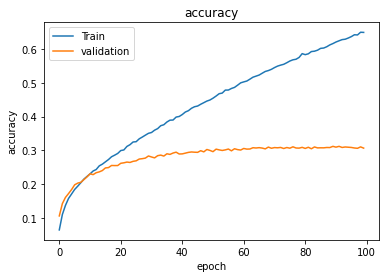

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

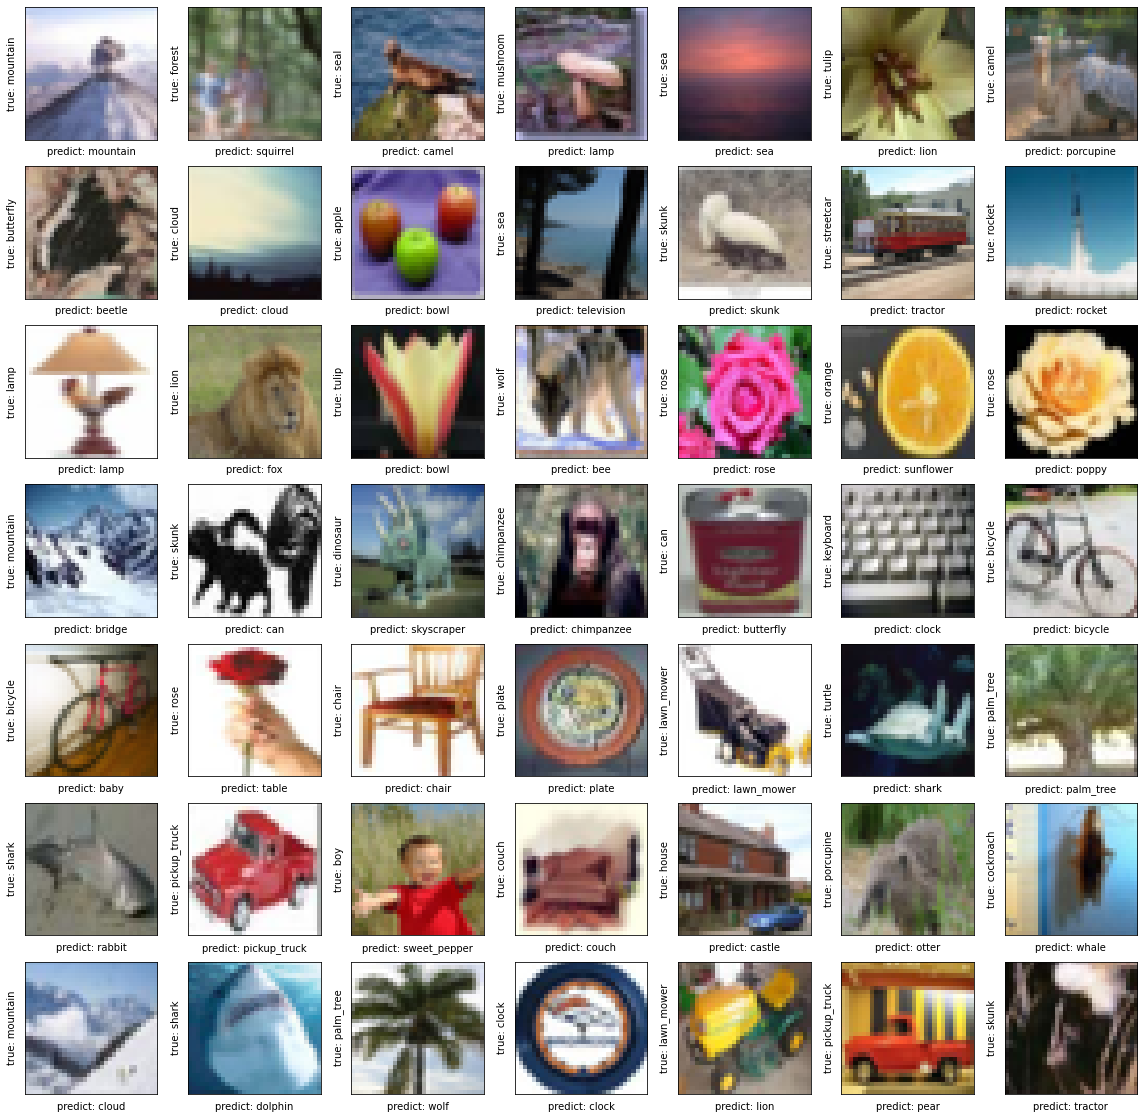

In [12]:
y_pred = model.predict(x_test)
plt.figure(figsize=(20,20))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel("predict: "+classes[np.argmax(y_pred[i])])
  plt.ylabel("true: "+classes[np.argmax(y_test[i])])
plt.show()

Cifar 100 CNN

In [13]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import load_model
from keras.backend import categorical_crossentropy



In [14]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
x=x_test
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [15]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train=to_categorical(y_train,num_classes=100)
y_test=to_categorical(y_test,num_classes=100)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


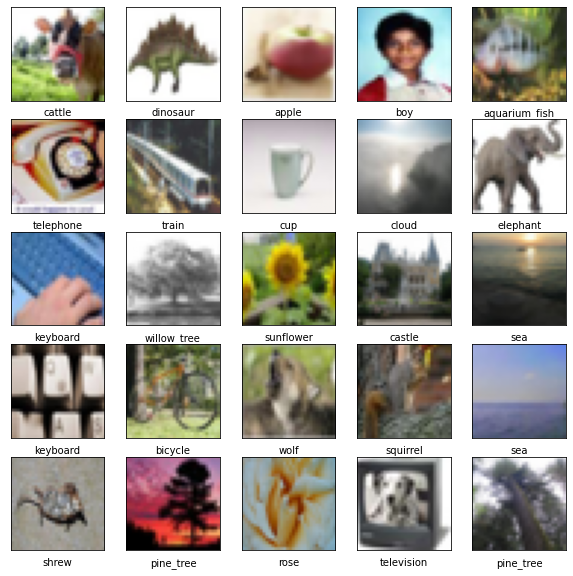

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(classes[np.argmax(y_train[i])])
plt.show()

In [18]:
model = Sequential()

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(784,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(784,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))

model.add(Dense(100,activation='Softmax'))
model.summary()
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)        

In [19]:
history = model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test)) #new

Epoch 1/20


2022-05-19 06:59:53.936421: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


391/391 [==============================] - 24s 42ms/step - loss: 4.4189 - accuracy: 0.0345 - val_loss: 4.0616 - val_accuracy: 0.0811
Epoch 2/20
391/391 [==============================] - 15s 38ms/step - loss: 3.8605 - accuracy: 0.1084 - val_loss: 3.5509 - val_accuracy: 0.1702
Epoch 3/20
391/391 [==============================] - 15s 38ms/step - loss: 3.4611 - accuracy: 0.1755 - val_loss: 3.2064 - val_accuracy: 0.2344
Epoch 4/20
391/391 [==============================] - 15s 37ms/step - loss: 3.1718 - accuracy: 0.2285 - val_loss: 3.0142 - val_accuracy: 0.2682
Epoch 5/20
391/391 [==============================] - 15s 38ms/step - loss: 2.9371 - accuracy: 0.2713 - val_loss: 2.7264 - val_accuracy: 0.3190
Epoch 6/20
391/391 [==============================] - 15s 38ms/step - loss: 2.7072 - accuracy: 0.3160 - val_loss: 2.5499 - val_accuracy: 0.3541
Epoch 7/20
391/391 [==============================] - 15s 38ms/step - loss: 2.5179 - accuracy: 0.3566 - val_loss: 2.4102 - val_accuracy: 0.3823
Epo

In [20]:
model.save('./cifar100_cnn.h5')

In [ ]:
model = load_model('./cifar100_cnn.h5')

In [21]:
score=model.evaluate(x_test,y_test,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

313/313 [==============================] - 2s 7ms/step - loss: 2.1691 - accuracy: 0.5126
test loss =  2.169098377227783
test accuracy =  0.5126000046730042


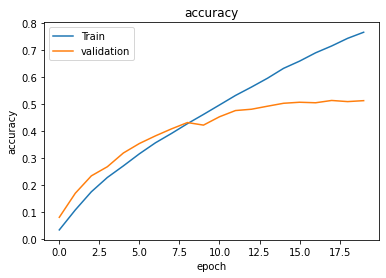

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

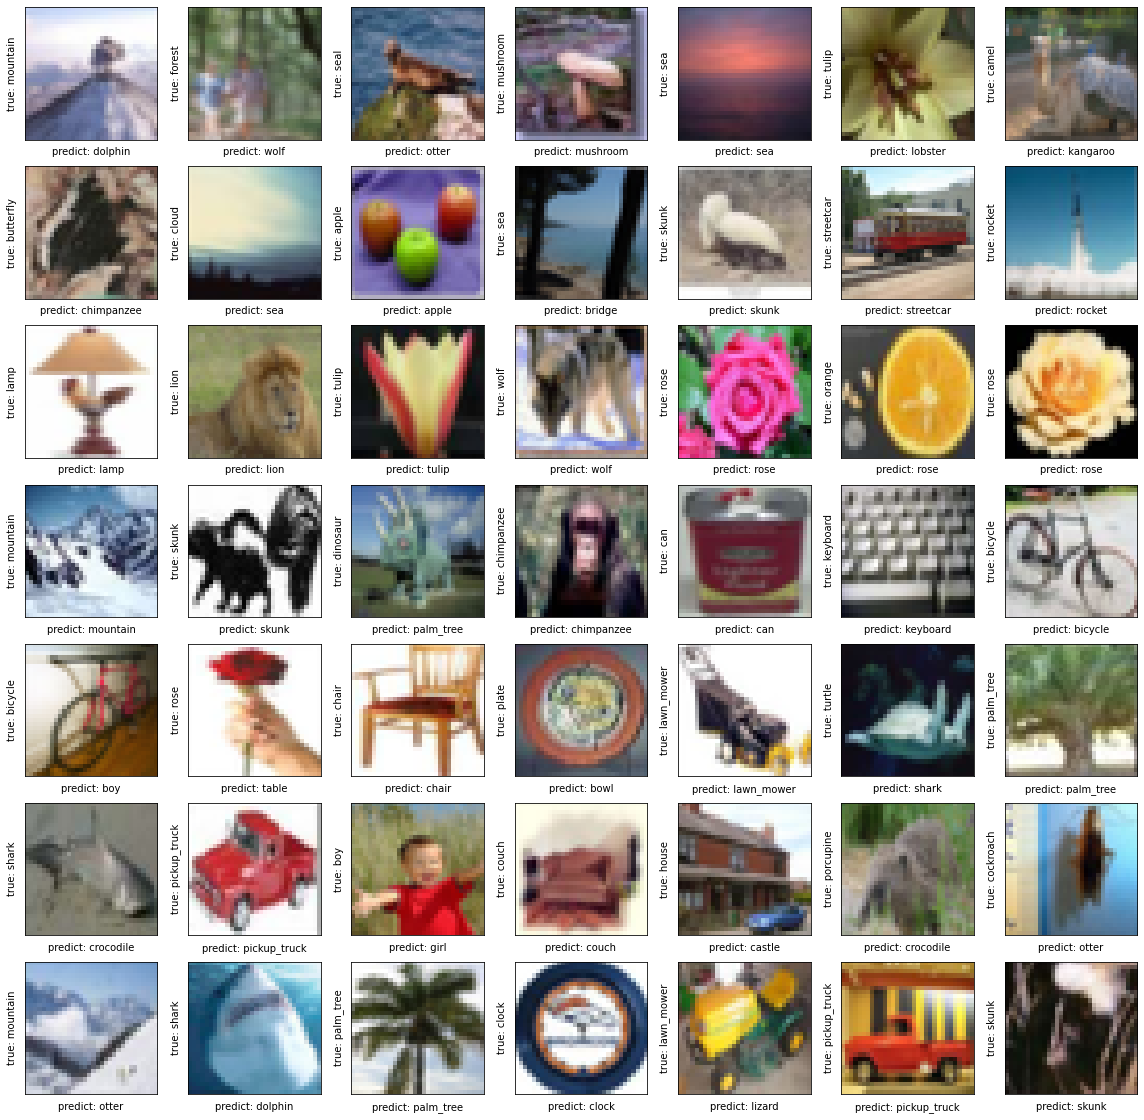

In [24]:
y_pred = model.predict(x_test)
plt.figure(figsize=(20,20))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel("predict: "+classes[np.argmax(y_pred[i])])
  plt.ylabel("true: "+classes[np.argmax(y_test[i])])
plt.show()